In [53]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
import statsmodels
import sklearn.linear_model
import scipy, scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
%matplotlib inline

CreditRisk = pd.read_csv("CreditRisk.csv")

In [54]:
CreditRisk.columns

Index(['City', 'CC_Payments', 'Wage', 'Cost_Living', 'Mtg', 'Default',
       'Vacations', 'Ottawa', 'Vancouver'],
      dtype='object')

In [55]:
#Ottawa and Vancouver are dummy variables of the field City
CreditRisk.describe()

,CC_Payments,Wage,Cost_Living,Mtg,Vacations,Ottawa,Vancouver
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15085.173333,85327.020000,35959.893333,34264.260000,9789.563333,0.333333,0.336667
std,24142.424244,12002.180144,12550.754681,15048.593736,3133.039806,0.472192,0.473359
min,-40164.000000,59734.000000,3654.000000,10583.000000,87.000000,0.000000,0.000000
25%,-3234.750000,76953.750000,27630.750000,19554.500000,7727.000000,0.000000,0.000000
50%,11422.500000,84288.000000,35481.500000,34198.000000,10004.000000,0.000000,0.000000
75%,38863.500000,93335.750000,43542.750000,45641.250000,11960.250000,1.000000,1.000000
max,63210.000000,119703.000000,75355.000000,82760.000000,17421.000000,1.000000,1.000000


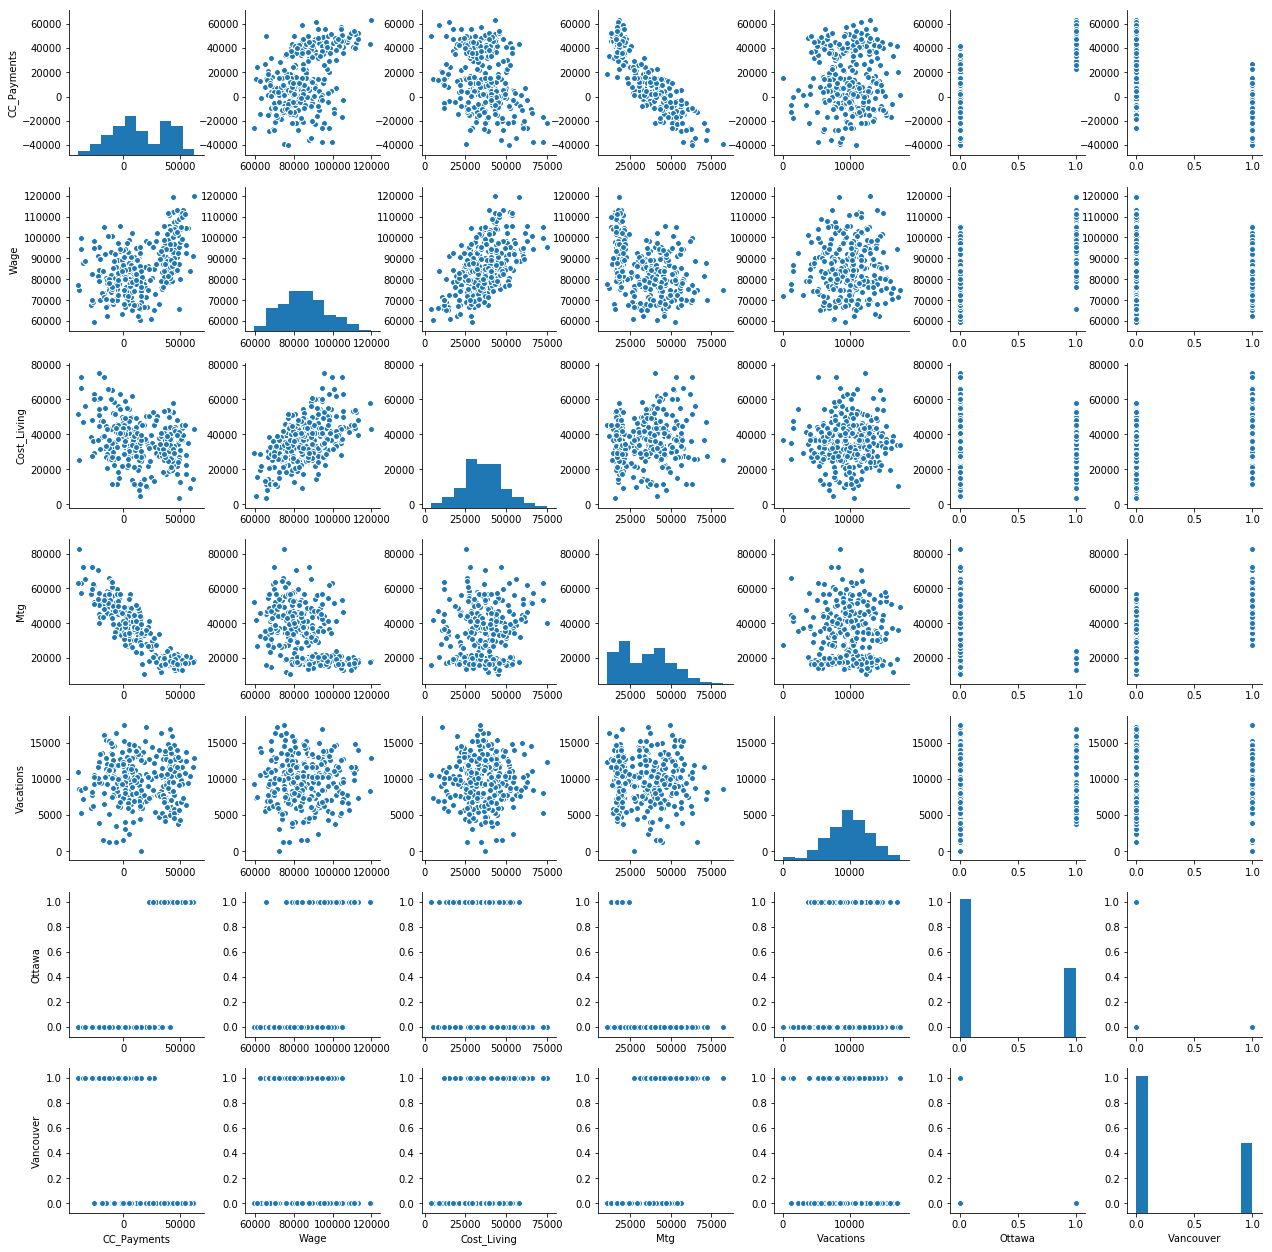

In [56]:
sns.pairplot(CreditRisk)

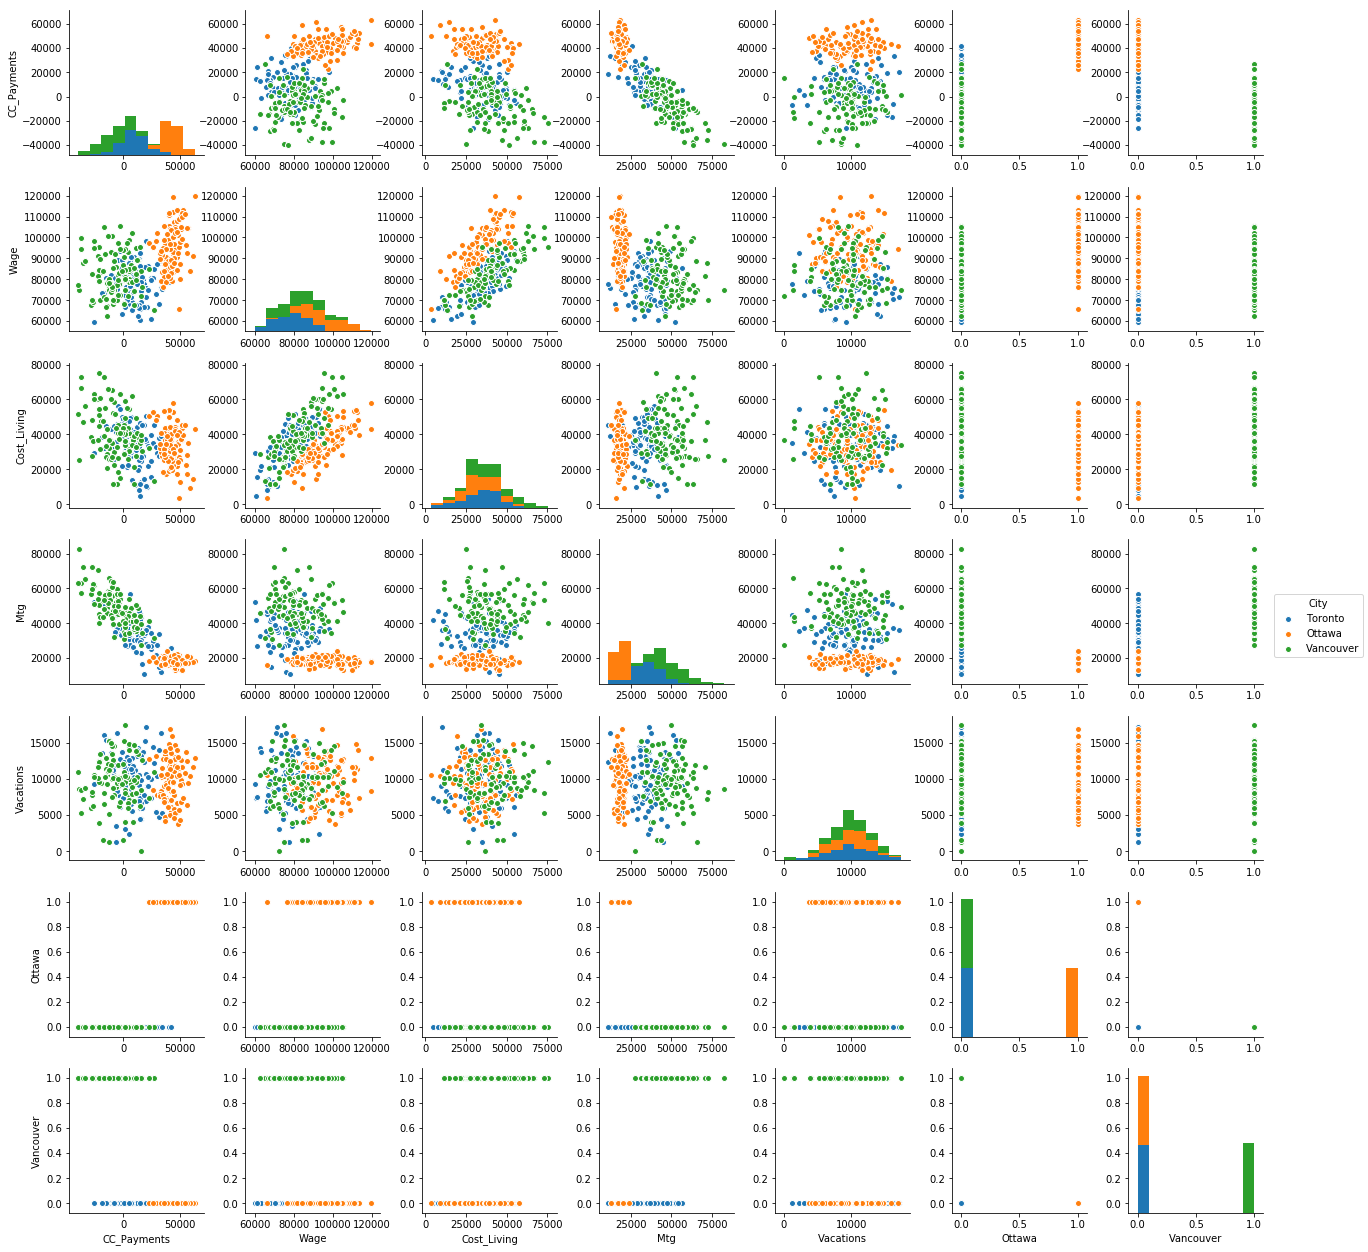

In [57]:
sns.pairplot(CreditRisk, hue='City')

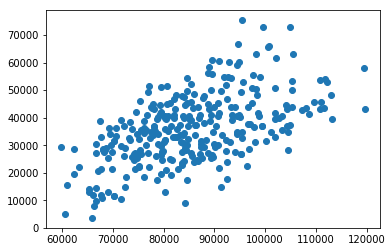

In [59]:
plt.scatter( CreditRisk.Wage, CreditRisk.Cost_Living,marker="o")

In [60]:
result = sm.ols(formula='CreditRisk.Wage ~ CreditRisk.Cost_Living', data=CreditRisk).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CreditRisk.Wage   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 02 Jul 2018   Prob (F-statistic):           9.44e-26
Time:                        23:59:03   Log-Likelihood:                -3187.5
No. Observations:                 300   AIC:                             6379.
Df Residuals:                     298   BIC:                             6386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                6.62e+04   1753.250     37.761      0.000    6.28e+04    6.97e+04
CreditRisk.Cost_Living     0.5318      0.046     11.550      0.000       0.441       0.622
==============================================================================
Omnibus:                       13.055   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.041
Skew:                           0.471   Prob(JB):                      0.00147
Kurtosis:                       2.607   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

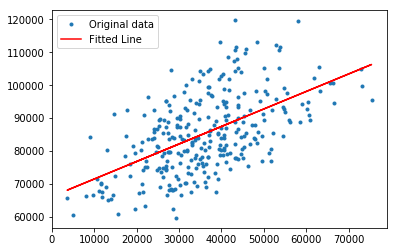

In [61]:
#Graphical Output
plt.plot(CreditRisk.Cost_Living, CreditRisk.Wage, 'o', label='Original data', markersize=3)
intercept, slope = result.params
plt.plot(CreditRisk.Cost_Living, intercept + slope * CreditRisk.Cost_Living , 'r-', label='Fitted Line')
plt.legend()
plt.show()

In [8]:
library(Hmisc)
tempdata <- CreditRisk [, c(2,3,4,5,7)]  #I want to build correlations for continuous variables
rcorr(as.matrix(tempdata))
#notice colinearity
#you can run both correlation and p values simultaneously using the Hmisc package

Warning message:
"package 'Hmisc' was built under R version 3.3.2"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.3.2"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"
Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



            CC_Payments  Wage Cost_Living   Mtg Vacations
CC_Payments        1.00  0.47       -0.32 -0.90      0.02
Wage               0.47  1.00        0.56 -0.41      0.02
Cost_Living       -0.32  0.56        1.00  0.13      0.01
Mtg               -0.90 -0.41        0.13  1.00     -0.03
Vacations          0.02  0.02        0.01 -0.03      1.00

n= 300 


P
            CC_Payments Wage   Cost_Living Mtg    Vacations
CC_Payments             0.0000 0.0000      0.0000 0.7413   
Wage        0.0000             0.0000      0.0000 0.7791   
Cost_Living 0.0000      0.0000             0.0193 0.8711   
Mtg         0.0000      0.0000 0.0193             0.5623   
Vacations   0.7413      0.7791 0.8711      0.5623          

/Users/sergiynokhrin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


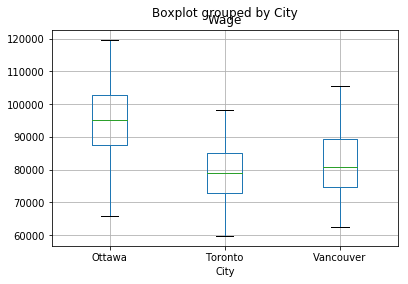

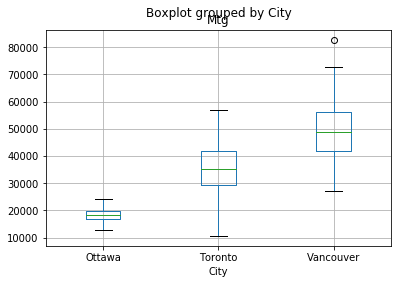

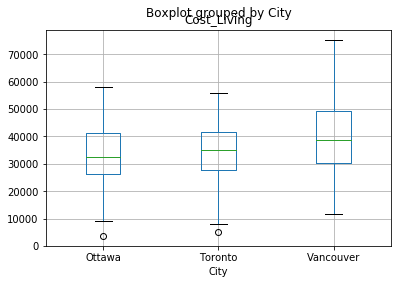

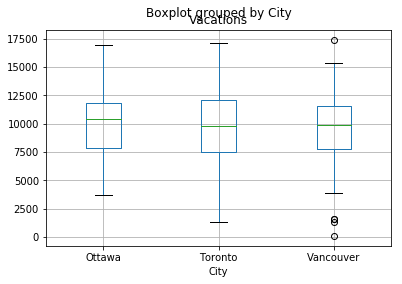

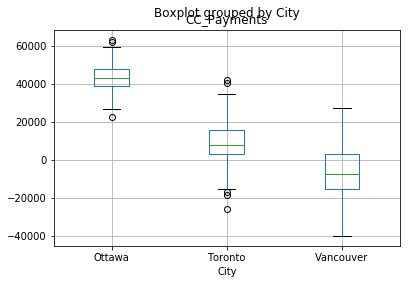

In [62]:

CreditRisk.boxplot(column='Wage', by='City')
CreditRisk.boxplot(column='Mtg', by='City')
CreditRisk.boxplot(column='Cost_Living', by='City')
CreditRisk.boxplot(column='Vacations', by='City')
CreditRisk.boxplot(column='CC_Payments', by='City')

In [63]:
result_full = sm.ols(formula='CreditRisk.CC_Payments ~ CreditRisk.City + CreditRisk.Wage + CreditRisk.Cost_Living + CreditRisk.Mtg + CreditRisk.Vacations', data=CreditRisk).fit()


In [64]:
result_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     CreditRisk.CC_Payments   R-squared:                       0.962
Model:                                OLS   Adj. R-squared:                  0.962
Method:                     Least Squares   F-statistic:                     1250.
Date:                    Mon, 02 Jul 2018   Prob (F-statistic):          1.85e-205
Time:                            23:59:17   Log-Likelihood:                -2960.6
No. Observations:                     300   AIC:                             5935.
Df Residuals:                         293   BIC:                             5961.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -2717.4124   3660.008     -0.742      0.458   -9920.649    4485.825
CreditRisk.City[T.Toronto]    1002.8863   1187.470      0.845      0.399   -1334.165    3339.938
CreditRisk.City[T.Vancouver]  1319.0113   1509.467      0.874      0.383   -1651.762    4289.784
CreditRisk.Wage                  1.0379      0.046     22.809      0.000       0.948       1.127
CreditRisk.Cost_Living          -1.0042      0.036    -27.716      0.000      -1.075      -0.933
CreditRisk.Mtg                  -1.0229      0.034    -29.870      0.000      -1.090      -0.955
CreditRisk.Vacations            -0.0382      0.087     -0.438      0.662      -0.210       0.134
==============================================================================
Omnibus:                        1.046   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.864
Skew:                           0.125   Prob(JB):                        0.649
Kurtosis:                       3.079   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
X_pred = CreditRisk[["City", "Wage", 'Cost_Living', 'Mtg', 'Vacations']]
X_pred.head(5)

,City,Wage,Cost_Living,Mtg,Vacations
0,Toronto,89925,44004,34237,13236
1,Toronto,82327,33111,35928,10788
2,Toronto,68972,12901,37791,8326
3,Toronto,67582,21491,29385,7647
4,Toronto,88983,43084,29614,10131


In [66]:
Y_ols_pred = result_full.predict(X)

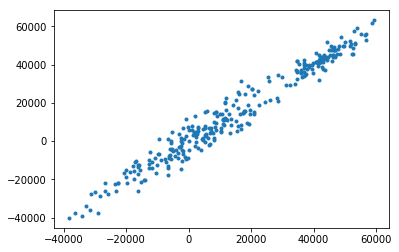

In [67]:
plt.plot(Y_ols_pred, CreditRisk.CC_Payments, 'o', label='Original data', markersize=3)
#intercept, slope = result.params
#plt.plot(df.Cost_Living, intercept + slope * df.Cost_Living , 'r-', label='Fitted Line')
#plt.legend()
#plt.show()

In [68]:
Residual_full= CreditRisk.CC_Payments - Y_ols_pred

((array([-2.83270147, -2.5363011 , -2.36847471, -2.24887944, -2.15478411,
         -2.07661294, -2.00938931, -1.95018201, -1.89711324, -1.84890481,
         -1.80464581, -1.76366326, -1.72544529, -1.68959313, -1.65578984,
         -1.62377915, -1.5933508 , -1.56433003, -1.53656998, -1.50994596,
         -1.48435118, -1.45969344, -1.43589258, -1.41287842, -1.39058917,
         -1.36897015, -1.34797267, -1.32755325, -1.30767283, -1.28829622,
         -1.26939159, -1.25093005, -1.23288529, -1.21523328, -1.19795202,
         -1.1810213 , -1.16442252, -1.1481385 , -1.13215338, -1.11645243,
         -1.10102199, -1.08584934, -1.07092263, -1.0562308 , -1.04176348,
         -1.02751099, -1.01346422, -0.99961462, -0.98595415, -0.97247524,
         -0.95917073, -0.94603388, -0.93305829, -0.92023793, -0.90756706,
         -0.89504026, -0.88265235, -0.87039844, -0.85827385, -0.84627414,
         -0.83439507, -0.82263259, -0.81098284, -0.79944213, -0.78800692,
         -0.77667384, -0.76543965, -0.

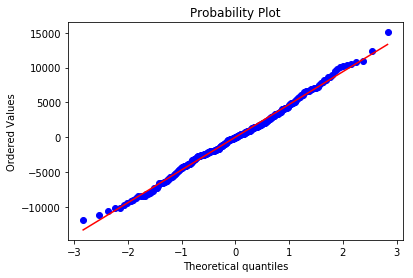

In [69]:
scipy.stats.probplot(Residual_full, sparams=(), dist='norm', fit=True, plot=plt)

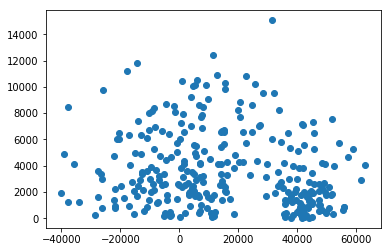

In [71]:
scatter(CreditRisk.CC_Payments, abs(Residual_full))